# **Introduction**

The analyzed dataset contains clinical records of 165 patients diagnosed with hepatocellular carcinoma (HCC), collected at the Centro Hospitalar e Universitário de Coimbra in Portugal. The main goal of this project is to develop a machine learning pipeline capable of determining the survivability of patients at 1 year after diagnosis.

## Repository
https://github.com/yunnie05/DS-project

## Libraries used in the project

In [1]:
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from copy import deepcopy
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_fscore_support, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# **DATA EXPLORATION**

### Checking and filling missing values

#### It's important to clarify that in this data set '?' should be considered as missing values.

In [2]:
hcc= pd.read_csv("hcc_dataset.csv", sep= ",", na_values= ['?'])
hcc.Encephalopathy

0      No
1      No
2      No
3      No
4      No
       ..
160    No
161    No
162    No
163    No
164    No
Name: Encephalopathy, Length: 165, dtype: object

#### -Checking the amount of missing values on each feature

In [3]:
print(hcc.head())
hcc.isnull().sum().sort_values(ascending=False)

   Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking  \
0    Male       No     Yes    No    No    No    No       Yes      No     Yes   
1  Female      NaN      No    No    No    No   Yes       Yes     NaN     NaN   
2    Male       No     Yes   Yes    No   Yes    No       Yes      No     Yes   
3    Male      Yes     Yes    No    No    No    No       Yes      No     Yes   
4    Male      Yes     Yes   Yes    No   Yes    No       Yes      No     Yes   

   ...    ALP   TP Creatinine Nodules Major_Dim Dir_Bil  Iron   Sat Ferritin  \
0  ...  150.0  7.1       0.70     1.0       3.5     0.5   NaN   NaN      NaN   
1  ...    NaN  NaN        NaN     1.0       1.8     NaN   NaN   NaN      NaN   
2  ...  109.0  7.0       2.10     5.0      13.0     0.1  28.0   6.0     16.0   
3  ...  174.0  8.1       1.11     2.0      15.7     0.2   NaN   NaN      NaN   
4  ...  109.0  6.9       1.80     1.0       9.0     NaN  59.0  15.0     22.0   

   Class  
0  Lives  
1  Lives  
2  Li

Ferritin          80
Sat               80
Iron              79
Packs_year        53
Varices           52
Grams_day         48
Dir_Bil           44
Smoking           41
HBeAg             39
Endemic           39
HBcAb             24
Hemochro          23
NASH              22
Major_Dim         20
Symptoms          18
HBsAg             17
Spleno            15
HIV               14
TP                11
PHT               11
Obesity           10
HCVAb              9
AFP                8
Creatinine         7
Albumin            6
Total_Bil          5
INR                4
ALT                4
Metastasis         4
AST                3
Leucocytes         3
Platelets          3
PVT                3
MCV                3
Hemoglobin         3
Ascites            3
ALP                3
AHT                3
Diabetes           3
GGT                3
Hallmark           2
CRI                2
Nodules            2
Encephalopathy     1
Gender             0
PS                 0
Age                0
Cirrhosis    

Analysing the dataset, we can see that these data are not actually empty, they are named "None", and the program interpreted as Null, we have to fix this:

In [4]:
#Analysing values NaN
hcc['Encephalopathy']

0      No
1      No
2      No
3      No
4      No
       ..
160    No
161    No
162    No
163    No
164    No
Name: Encephalopathy, Length: 165, dtype: object

Besides, we also noticed that some numbers were categorized as 'objects', we also have to fix this:

In [5]:
hcc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

To make our analysis more accurate, let's fix the problems mentionted above:

In [6]:
hcc.replace(np.nan, 'None', inplace=True) # In the table, there are cells with the value None which it interprets as np.nan, so we need to ensure it understands this as a valid value
hcc.replace('?', np.nan, inplace=True) # The empty cells contain a '?', so here we indicate that these cells are NaN

hcc.info()
# After making this change, it becomes clear that we have many null values to handle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

In [7]:
# Converting numeric columns
for column in hcc.columns:
    # Converting values that are numeric to float
    if hcc[column].dtype == 'object':
        try:
            if hcc[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull().any() and column != 'Nodules': # Because Nodules is a category despite being defined by numbers
                hcc[column] = pd.to_numeric(hcc[column], errors='coerce')
        except ValueError:
            try:
                hcc[column] = pd.to_datetime(hcc[column], errors='coerce')
            except ValueError:
                pass
hcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        165 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           165 non-null    object 
 4   HBeAg           165 non-null    object 
 5   HBcAb           165 non-null    object 
 6   HCVAb           165 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         165 non-null    object 
 9   Smoking         165 non-null    object 
 10  Diabetes        165 non-null    object 
 11  Obesity         165 non-null    object 
 12  Hemochro        165 non-null    object 
 13  AHT             165 non-null    object 
 14  CRI             165 non-null    object 
 15  HIV             165 non-null    object 
 16  NASH            165 non-null    object 
 17  Varices         165 non-null    obj

**Then we checked the percentage of Null values in each category.**
Some categories, such as "Iron", "Sat" and "Ferritin", have a significant number of missing values. But, since none of them are above 50%, we decided to keep all values, specially because we don't know how important these categories can be for the analysis.

In [8]:
# Calculate the percentage of missing values in each column
print("\n=== total percentage of missing values ===")
total_missing = (hcc.isnull().mean().mean() * 100)
total_missing = "{:.2f}%".format(total_missing)
print(total_missing)

print("\n=== Missing values per category ===")
percent_missing = hcc.isnull().mean() * 100
percent_missing = percent_missing.apply(lambda x: "{:.2f}%".format(x))
print(percent_missing)


=== total percentage of missing values ===
5.70%

=== Missing values per category ===
Gender             0.00%
Symptoms           0.00%
Alcohol            0.00%
HBsAg              0.00%
HBeAg              0.00%
HBcAb              0.00%
HCVAb              0.00%
Cirrhosis          0.00%
Endemic            0.00%
Smoking            0.00%
Diabetes           0.00%
Obesity            0.00%
Hemochro           0.00%
AHT                0.00%
CRI                0.00%
HIV                0.00%
NASH               0.00%
Varices            0.00%
Spleno             0.00%
PHT                0.00%
PVT                0.00%
Metastasis         0.00%
Hallmark           0.00%
Age                0.00%
Grams_day         29.09%
Packs_year        32.12%
PS                 0.00%
Encephalopathy     0.00%
Ascites            0.00%
INR                2.42%
AFP                4.85%
Hemoglobin         1.82%
MCV                1.82%
Leucocytes         1.82%
Platelets          1.82%
Albumin            3.64%
Total_Bil    

**In order to understand the most relevants variables, we used two methods: the correlation matrix and the Cramer's method.** It is important to point out that we used these results to choose the variables for the construction of our algorithms (Decision Tree and KNN)

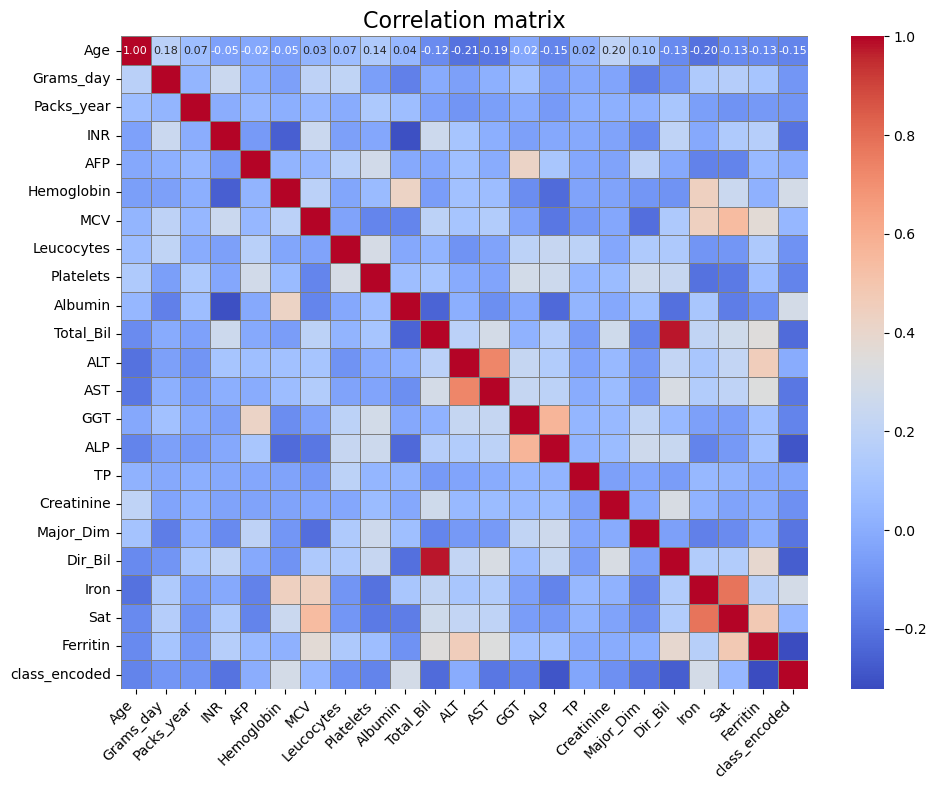

Correlation with the target variable (class):
Hemoglobin    0.292357
Iron          0.291406
Albumin       0.287799
Sat           0.043110
MCV           0.042074
AFP           0.001972
ALT          -0.006058
TP           -0.029274
Grams_day    -0.086573
Packs_year   -0.089814
Leucocytes   -0.102192
Creatinine   -0.108708
Age          -0.146054
GGT          -0.148655
Platelets    -0.150911
AST          -0.190614
Major_Dim    -0.193681
INR          -0.202348
Total_Bil    -0.223961
Dir_Bil      -0.264903
ALP          -0.293873
Ferritin     -0.321489
Name: class_encoded, dtype: float64


In [9]:
# Separating the numerical columns
numerical_cols = hcc.select_dtypes(include=['float64', 'int64'])
numerical_cols['class_encoded'] = hcc['Class'].astype('category').cat.codes

# Calculating the correlation matrix for numerical variables, including the encoded target variable
correlation_matrix = numerical_cols.corr()

# Enhancing the heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            annot_kws={"size": 8}, linewidths=0.5, linecolor='gray')
plt.title('Correlation matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Specific correlation of numerical variables with the target variable
target_corr = correlation_matrix['class_encoded'].drop('class_encoded')
print("Correlation with the target variable (class):")
print(target_corr.sort_values(ascending=False))


In [10]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

categorical_cols = hcc.select_dtypes(include=['object', 'category'])
categorical_cols = categorical_cols.drop(columns = ['Class'])

# Calculating Cramér's V for categorical variables
cramers = {}
for column in categorical_cols:
    contingency_table = pd.crosstab(hcc[column], hcc['Class'])
    cramers_v_value = cramers_v(contingency_table.to_numpy())
    cramers[column] = cramers_v_value

# Print the sorted values
for value in sorted(cramers.values(), reverse = True):
    for key, v in cramers.items():
        if v == value:
            # Print the key and value
            print(f'Cramér\'s V for {key}: {value}')
            break  # Stop when the key is found


Cramér's V for PS: 0.3964946684354381
Cramér's V for Symptoms: 0.3693784842726555
Cramér's V for Ascites: 0.27887272524871254
Cramér's V for Hemochro: 0.26341588208903344
Cramér's V for Metastasis: 0.25029808974014384
Cramér's V for PVT: 0.2374290399669085
Cramér's V for Varices: 0.22279246867746605
Cramér's V for Encephalopathy: 0.2095370445892069
Cramér's V for HCVAb: 0.17940860924593463
Cramér's V for Nodules: 0.16938246818037925
Cramér's V for Diabetes: 0.15469430127745565
Cramér's V for HBsAg: 0.14728623872574317
Cramér's V for HBcAb: 0.14296558984649418
Cramér's V for CRI: 0.12295880635417915
Cramér's V for HBeAg: 0.11945273310153283
Cramér's V for HIV: 0.1191522995992587
Cramér's V for PHT: 0.11735491270876316
Cramér's V for Endemic: 0.09561720086930568
Cramér's V for Hallmark: 0.09037829445952485
Cramér's V for NASH: 0.08132500607904443
Cramér's V for Smoking: 0.07852371819959385
Cramér's V for AHT: 0.0688590382696778
Cramér's V for Spleno: 0.03082823627878874
Cramér's V for Al

### **In order to have an even better understanding of our data, we also built many graph visualizations, to analyse them:**

### Percentage of each gender

In [11]:
gender_count= hcc['Gender'].value_counts(normalize= True)
print(gender_count)
gender_percentages= gender_count* 100
print(gender_percentages)

Gender
Male      0.806061
Female    0.193939
Name: proportion, dtype: float64
Gender
Male      80.606061
Female    19.393939
Name: proportion, dtype: float64


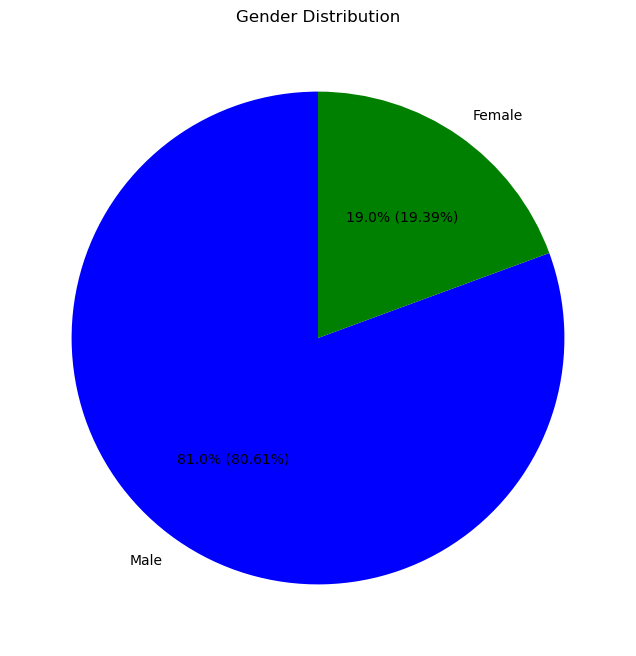

In [12]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:.1f}% ({p:.2f}%)'.format(p=pct, v=val)
    return my_format

plt.figure(figsize=(8, 8))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct=autopct_format(gender_percentages), startangle=90, colors=['b', 'g'])
plt.title('Gender Distribution')
plt.show()

In [13]:
def plot_bar(column):
    if column != 'Age':
        # Group the data and count the occurrences of each combination of gender and class
        grouped = hcc.groupby([column, 'Class']).size().unstack(fill_value=0)

        # Plot the graph
        ax = grouped.plot(kind='bar', stacked=False, color=colors)
    else:
        # Create age intervals of 5 years
        age_interval = pd.cut(hcc['Age'], bins=np.arange(20, hcc['Age'].max()+10, 10))

        # Group the data by age interval and count the occurrences of each combination of gender and class
        grouped = hcc.groupby([age_interval, 'Class'], observed=False).size().unstack(fill_value=0)

        # Plot the graph
        fig, ax = plt.subplots(figsize=(12, 4))
        grouped.plot(kind='bar', stacked=False, color=colors, ax=ax)

    # Add bar labels
    for container in ax.containers:
        ax.bar_label(container, label_type='center', padding=3)

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Quantity')
    plt.title(f'Class by {column} Graph')

    # Display the graph
    plt.show()


In [14]:
def plot_pie(column):
    # Create a figure with two subplots (ax1 and ax2)
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Filter data for 'Lives' class and calculate value frequencies for the specified column
    filtered_data = hcc[hcc['Class'] == 'Lives']
    values_frequency = filtered_data[column].value_counts()
    # Plot the pie chart for 'Lives' class
    ax1.pie(values_frequency.tolist(), labels=values_frequency.index.tolist(), colors=colors, autopct='%1.1f%%', startangle=140)
    ax1.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    ax1.set_title(f'{column} X Lives')

    # Filter data for 'Dies' class and calculate value frequencies for the specified column
    filtered_data = hcc[hcc['Class'] == 'Dies']
    values_frequency = filtered_data[column].value_counts()
    # Plot the pie chart for 'Dies' class
    ax2.pie(values_frequency.tolist(), labels=values_frequency.index.tolist(), colors=colors, autopct='%1.1f%%', startangle=140)
    ax2.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    ax2.set_title(f'Class by {column} Graph')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Display the pie charts
    plt.show()
    # Print newlines for separation
    print('\n\n')


In [15]:
def plot_scatter(column):
    lives_data = hcc[hcc['Class'] == 'Lives']
    dies_data = hcc[hcc['Class'] == 'Dies']

    # Plotting the points for people alive
    plt.scatter(lives_data[column], lives_data['Age'], color=colors[0], label='Lives')

    # Plotting the points for people deceased
    plt.scatter(dies_data[column], dies_data['Age'], color=colors[1], label='Dies')

    # Adding labels to the axes and the graph
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.title(f'Age by {column} Graph')
    plt.legend()

    # Displaying the graph
    plt.show()


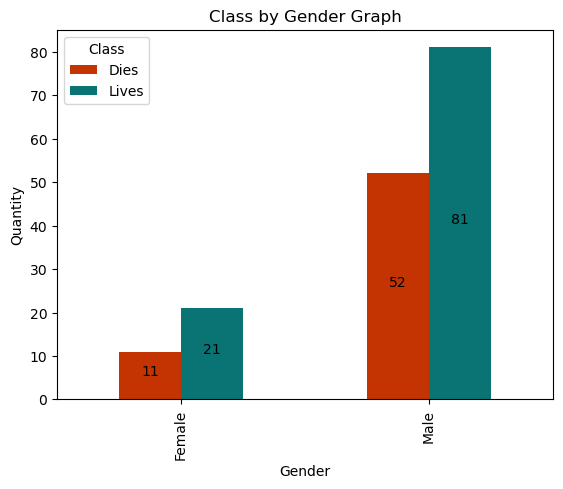

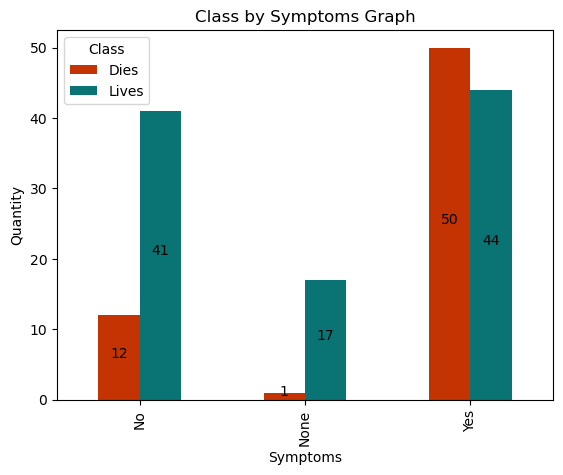

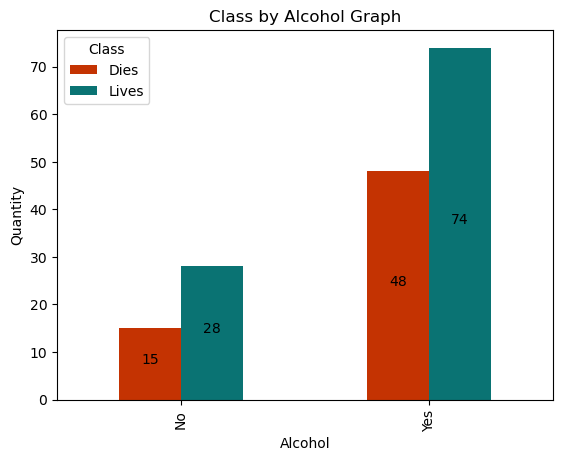

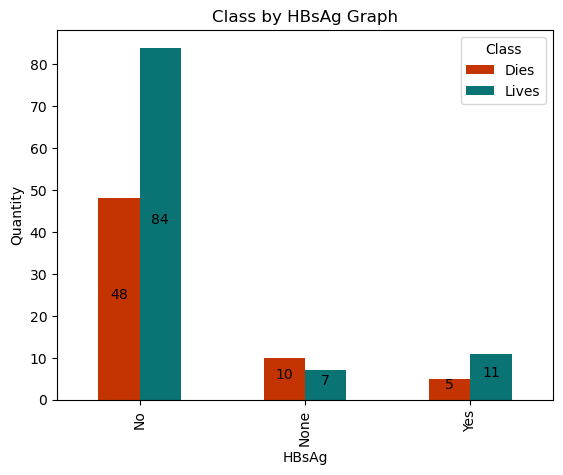

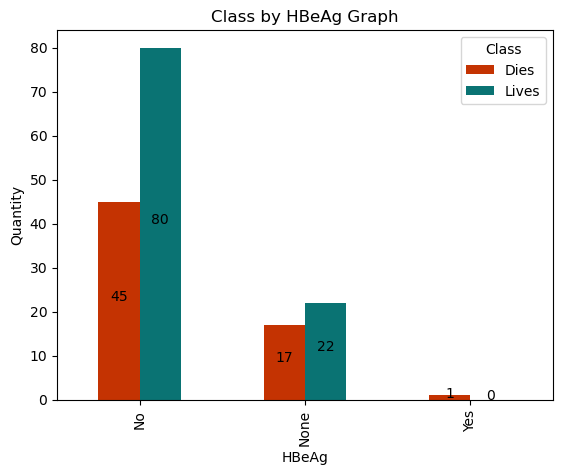

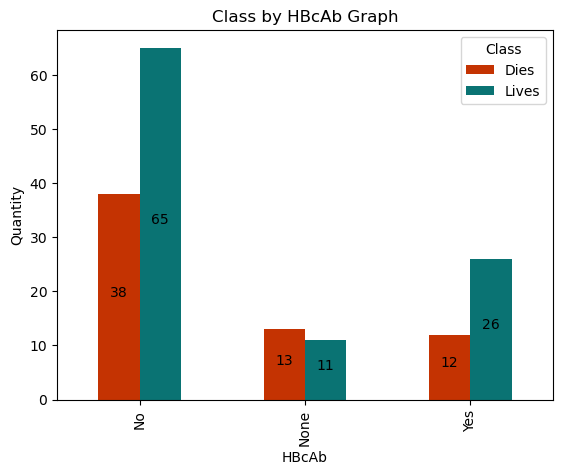

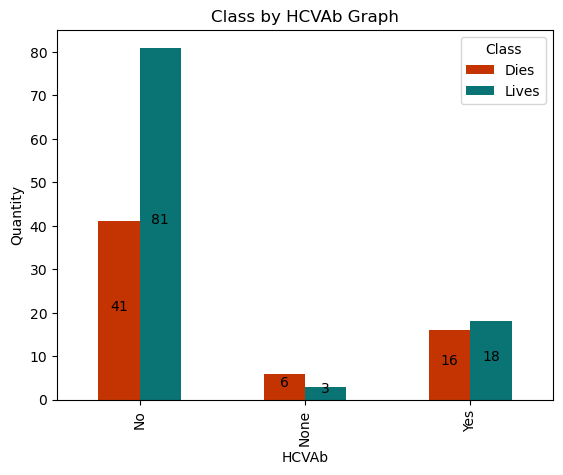

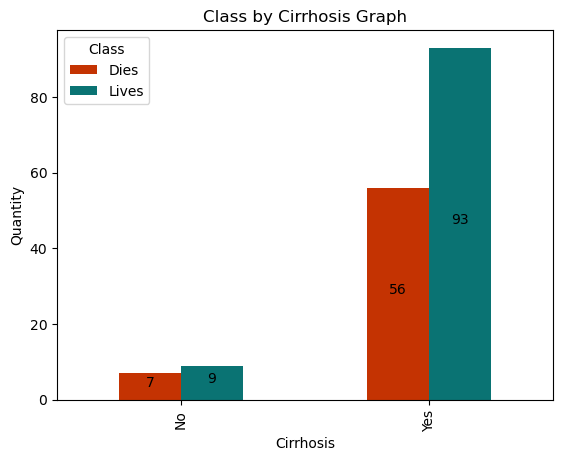

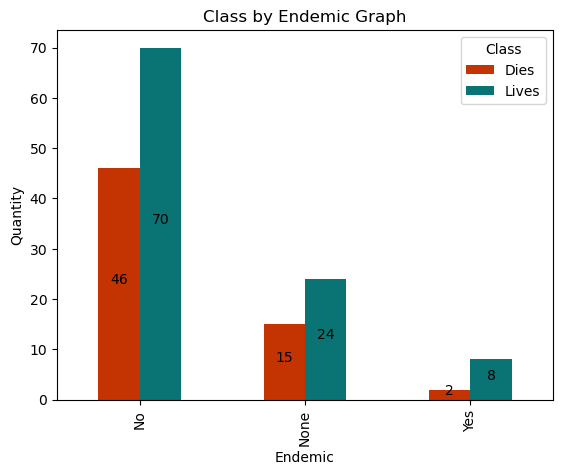

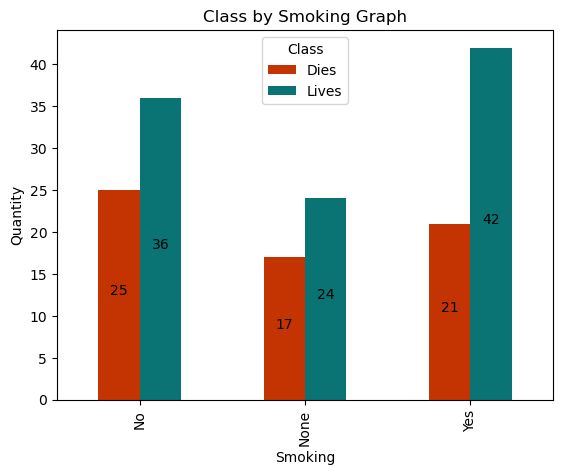

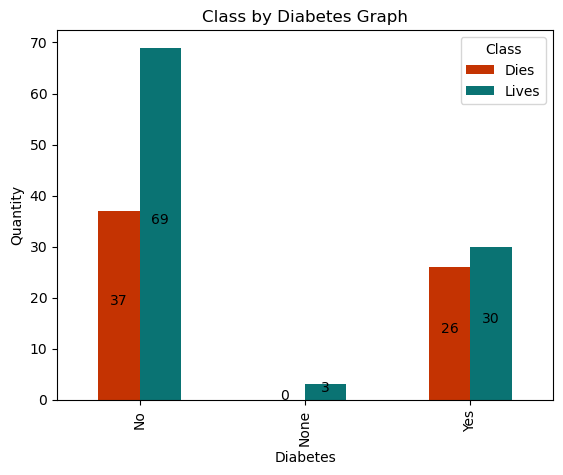

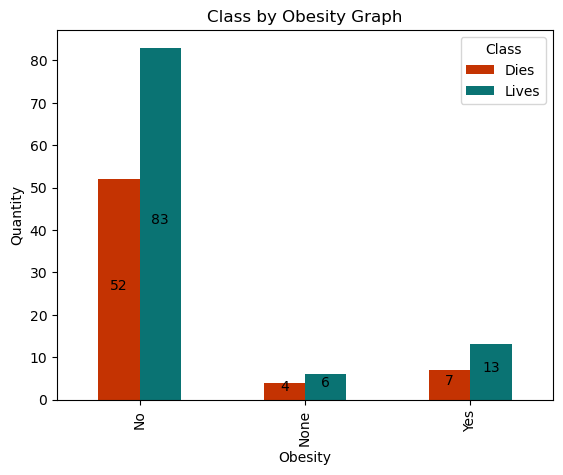

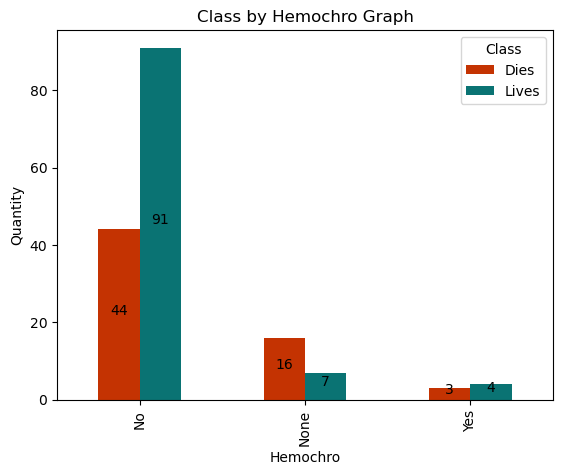

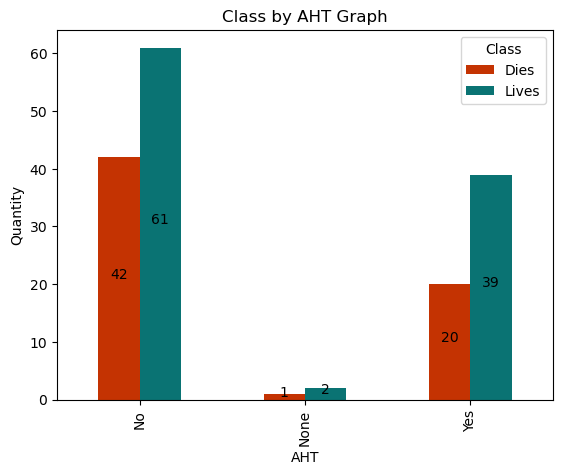

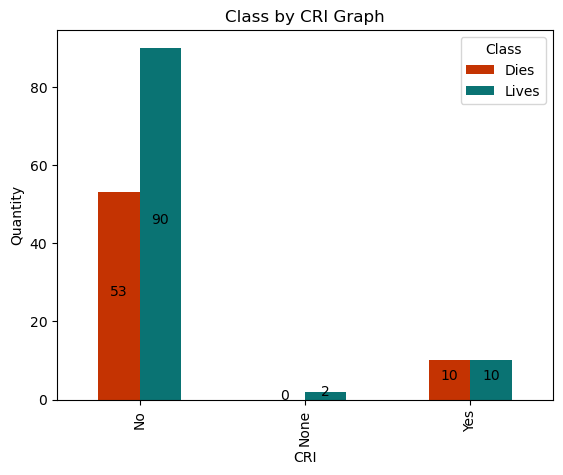

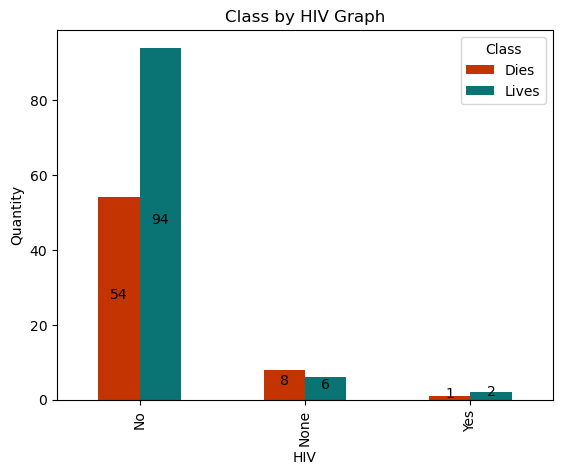

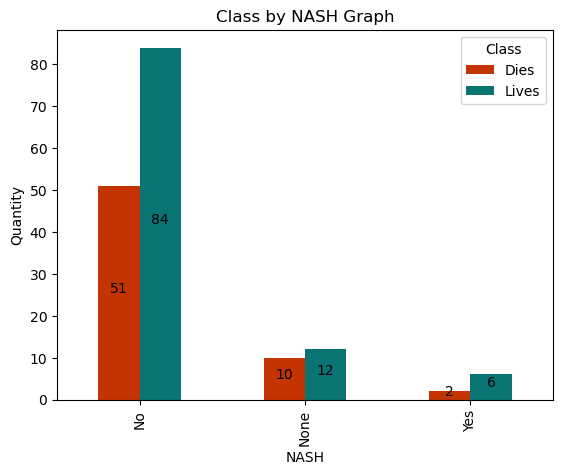

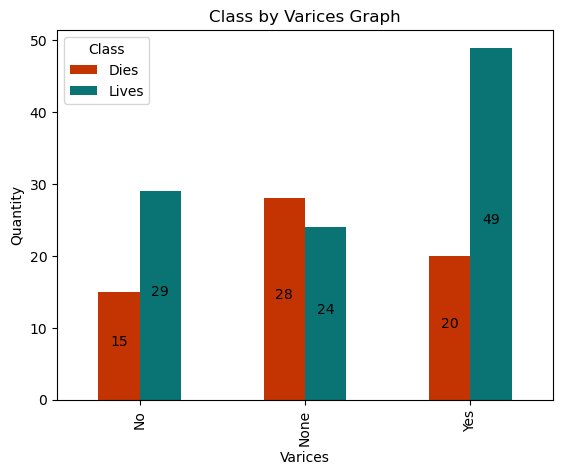

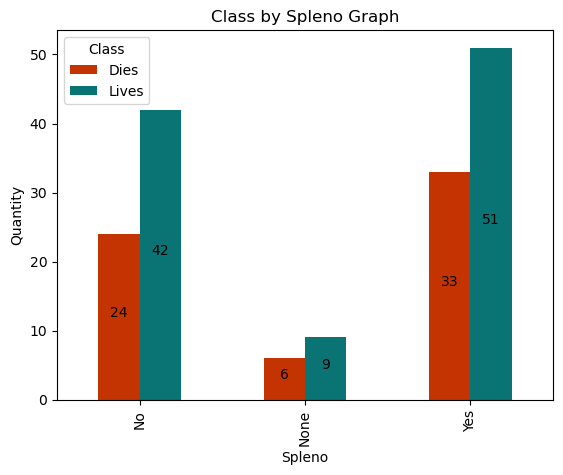

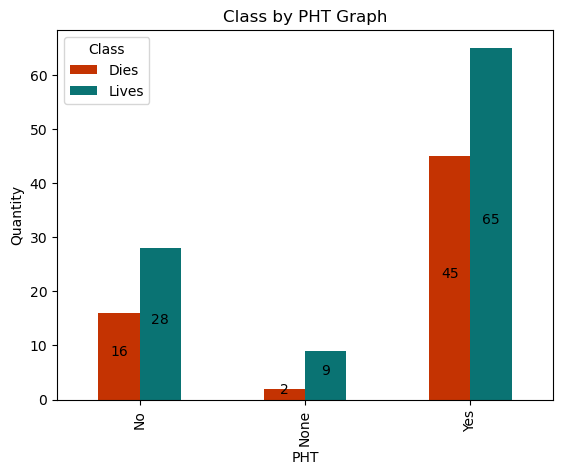

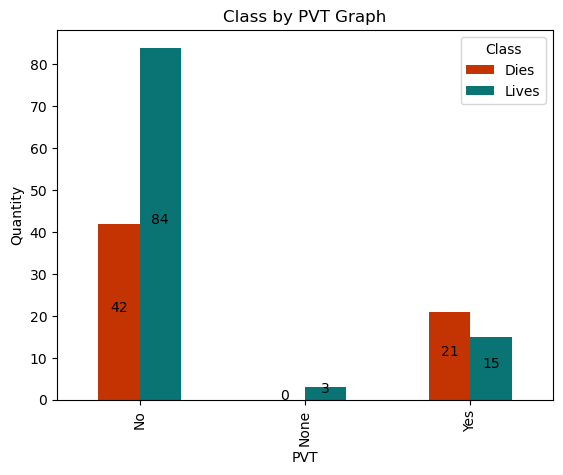

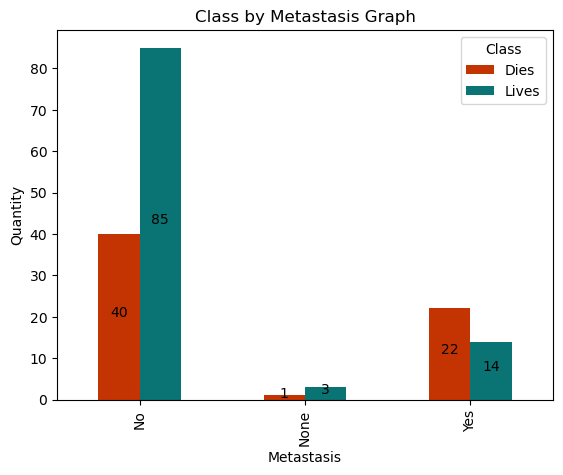

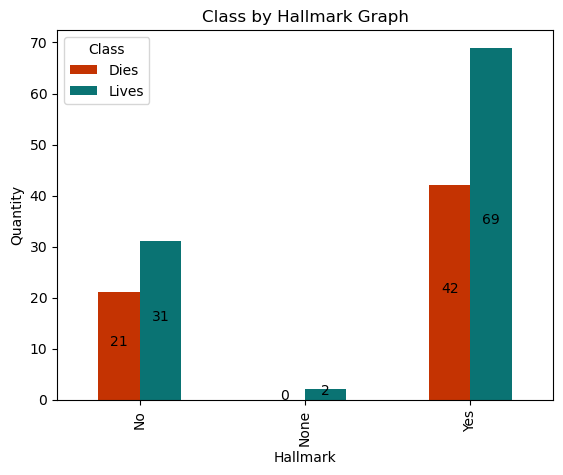

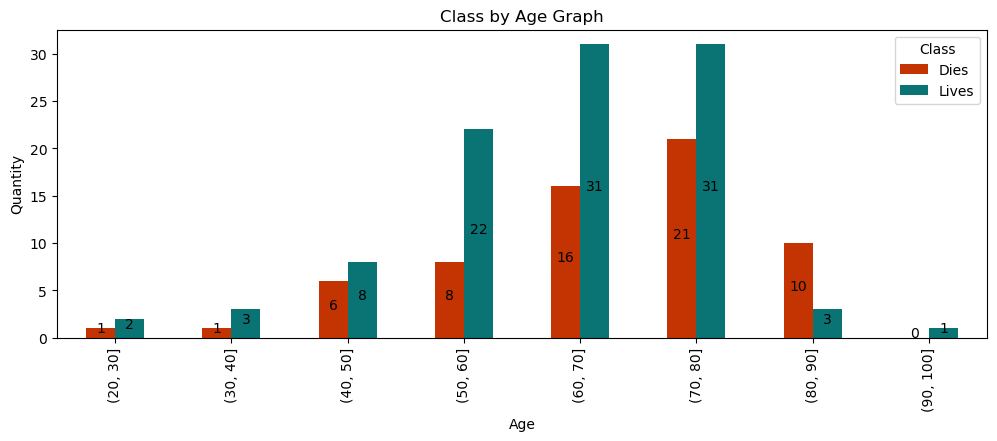

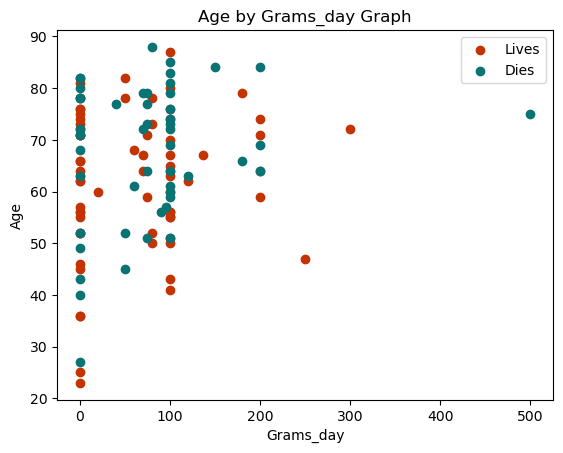

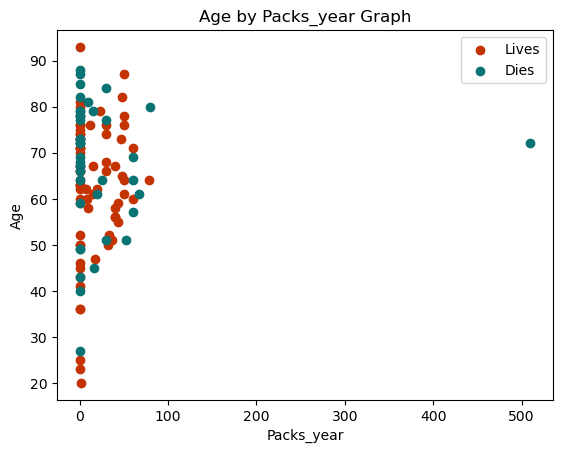

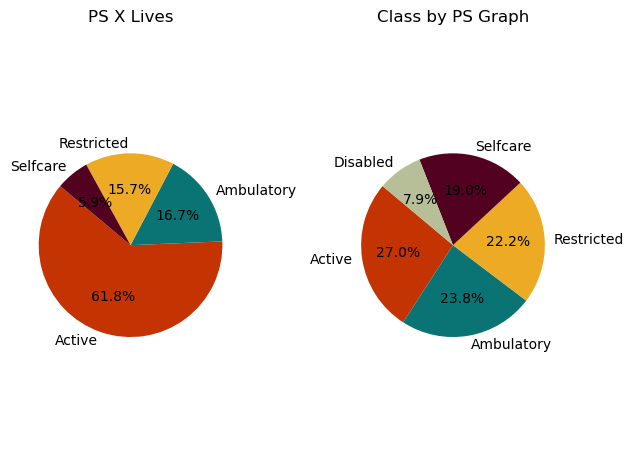

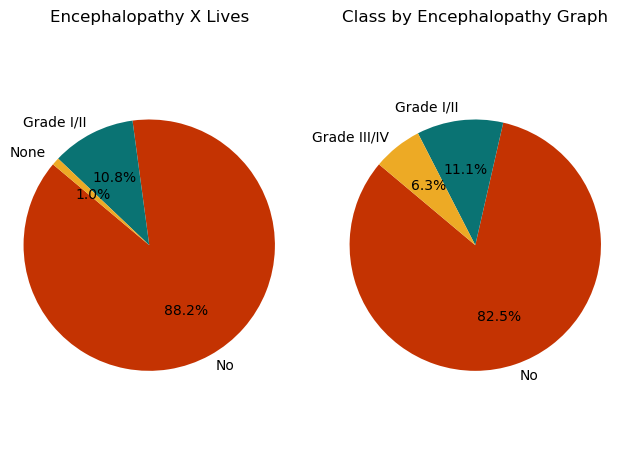

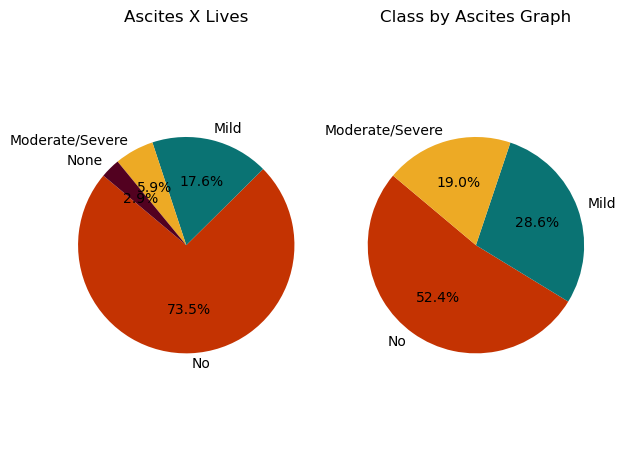

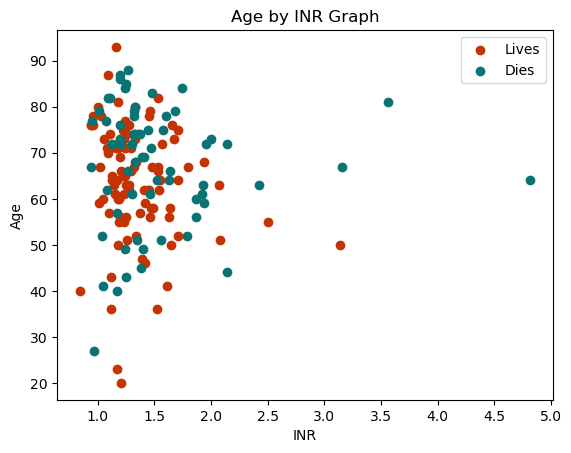

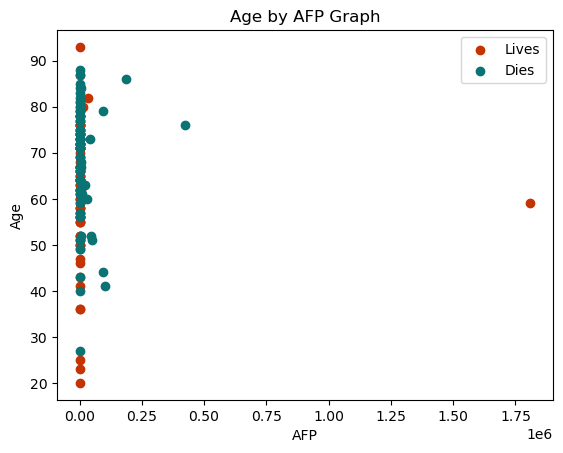

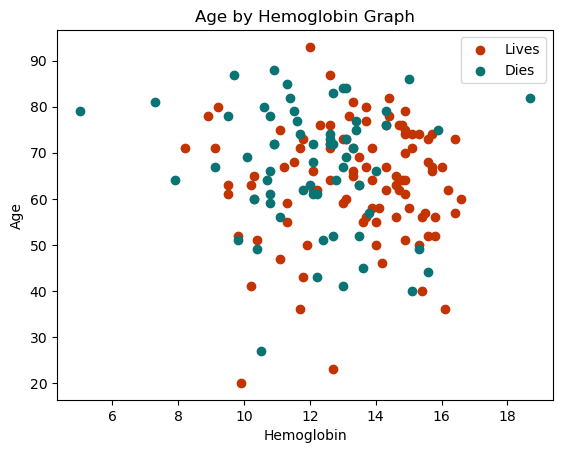

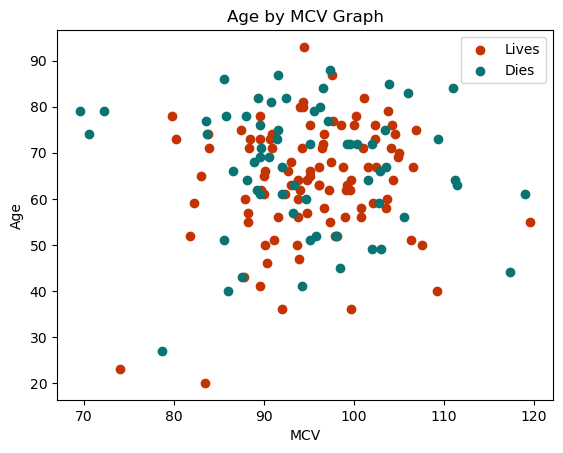

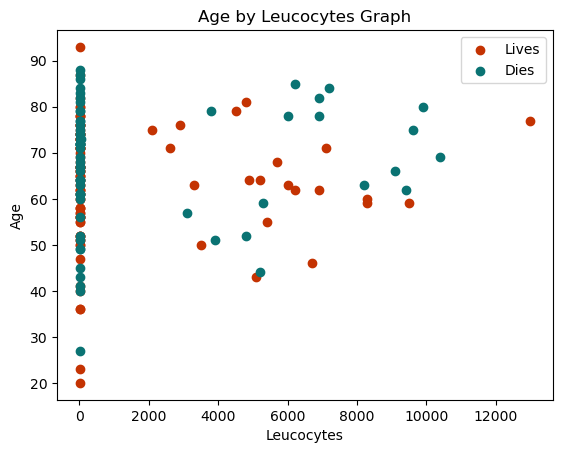

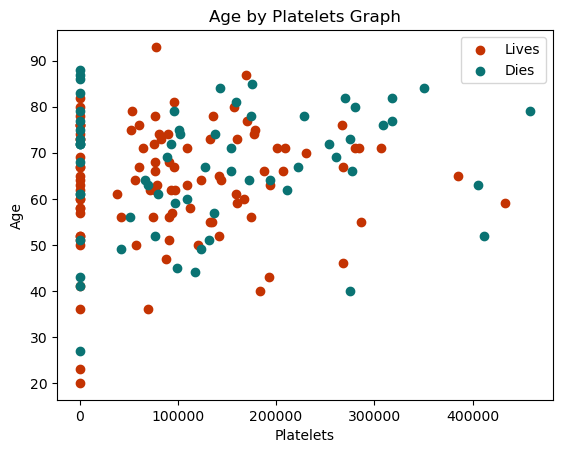

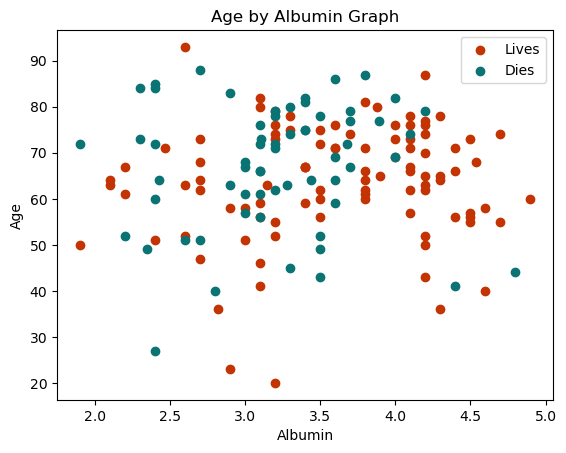

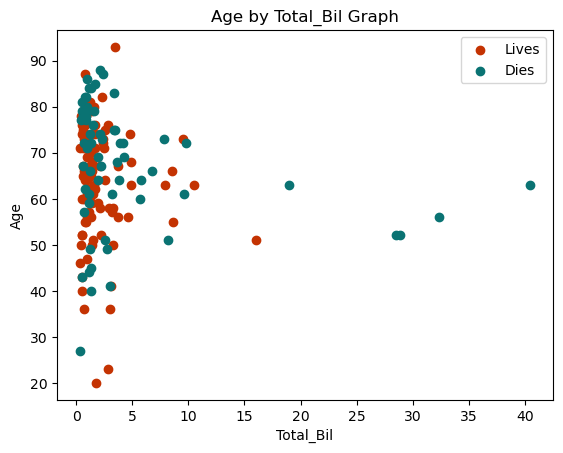

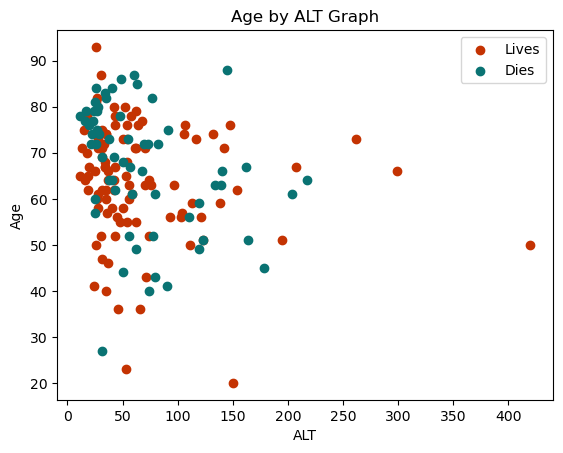

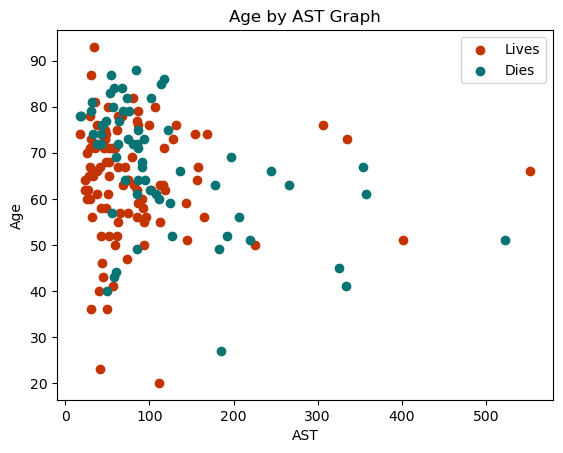

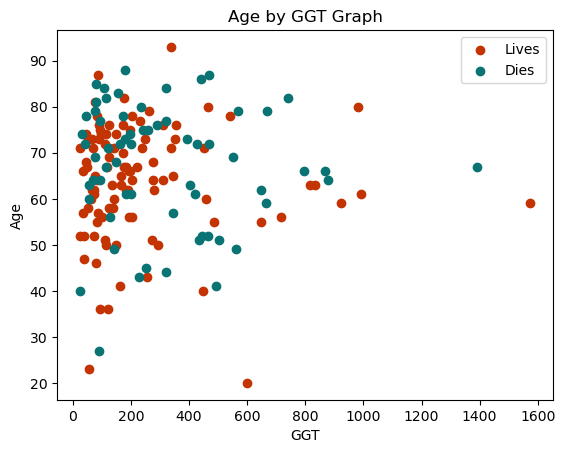

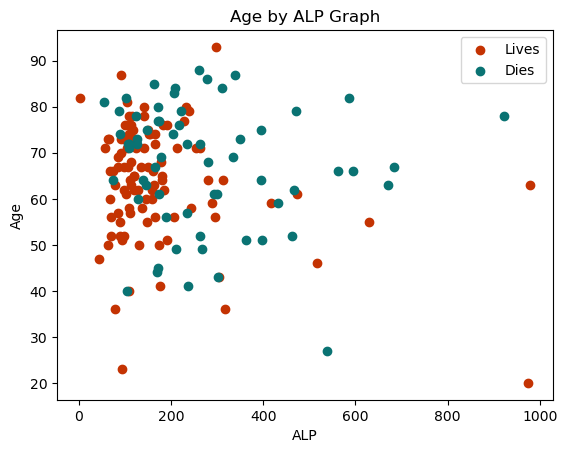

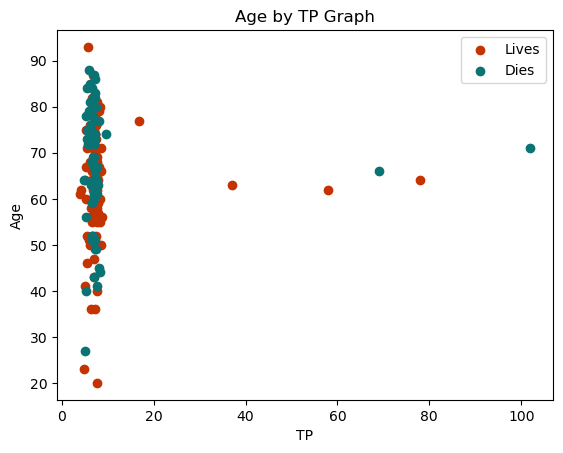

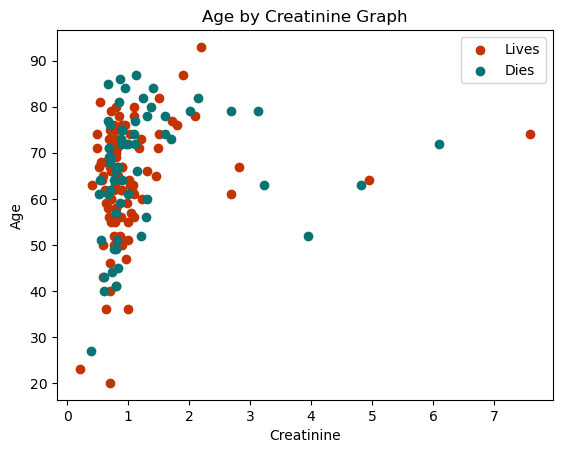

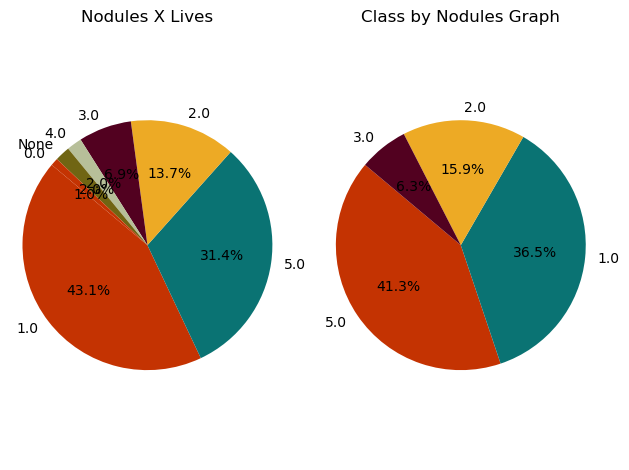

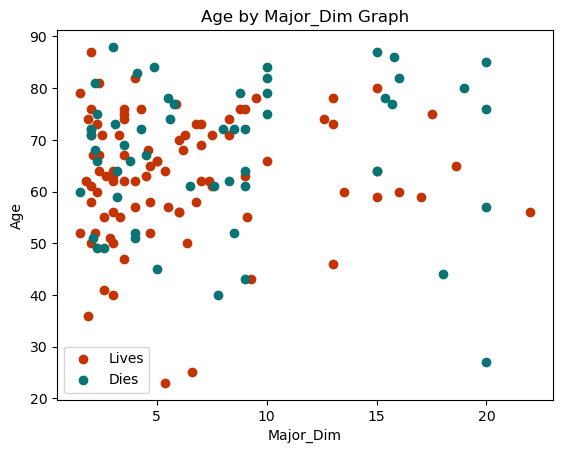

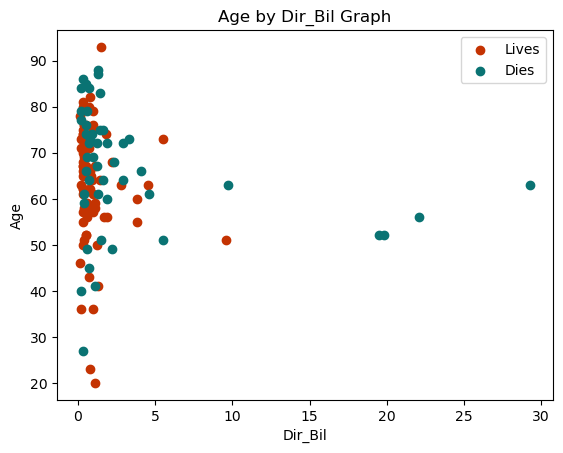

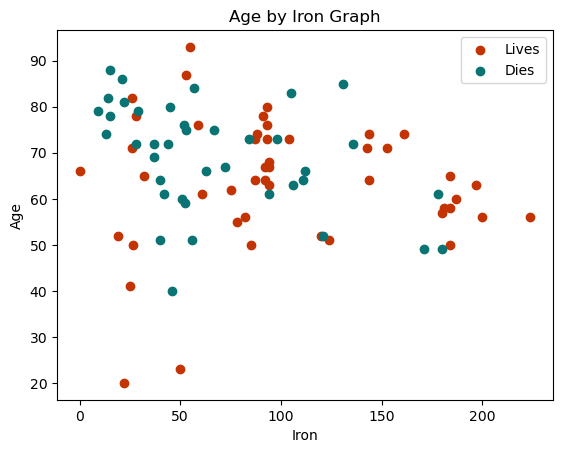

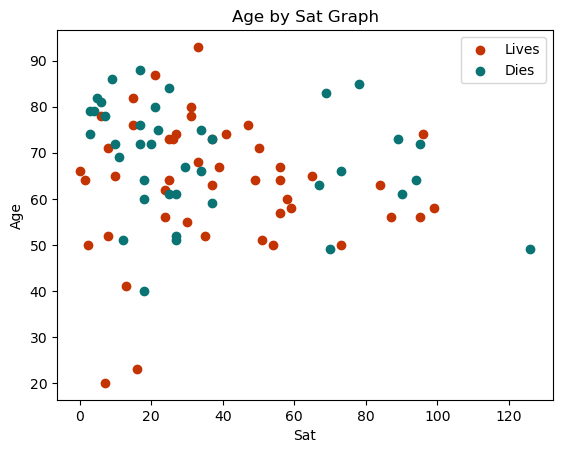

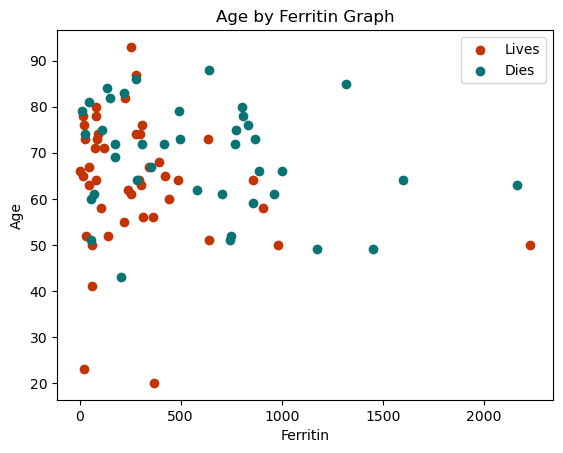

In [16]:
colors = ['#C43302', '#0A7373', '#EDAA25', '#520120', '#B7BF99', '#706513']

# Plotting the graphs for each of the columns:
for column in hcc.columns[:-1]: # This removes the 'Class' column, as it is our basis for analysis
    # Converting values that are numeric to float
    if hcc[column].dtype == 'object' or column == 'Age':
        if not(column in ['PS', 'Encephalopathy', 'Ascites', 'Nodules']):
            plot_bar(column)
        else:
            plot_pie(column)
    else:
        plot_scatter(column)
    print('\n\n')


**In this analysis we saw some possible issues to be fixed, but we decided not to fix the dataset, because of the context of the analysis, we udnerstood that the disease could be causing these "weird" values:**
Possible outliers:
-> Grams_Day (<5 points spread - distance > 50% of x)
-> INR (1 point too far away)
-> Packs_Yer
-> INR (<5 points spread - distance > 50%) #MAYBE NOT - it is more distributed than the others
-> AFP (1 point very far away)
-> Total_Bill (>5 points spread - distance > 30% of x)
-> ALT (<5 points spread - distance > 50% of x) #Maybe not
-> TP (There are some points that are too far apart) #Maybe it isn't either
-> Dir_Bil (<5 points spread - distance > 50% of x)

->Maybe there are outliers in the ALP;
-> Many zeros in Leukocytes;
-> Many zeros in Platelets;
'''

# **DATA PRE PROCESSING**

**In this part we will adress some of the issues observed in the Exploratory fase:imput missing values, transform non-numeric values in numbers, etc:**

##Processing of text and numeric data
At this stage, we treat null values and texts, and impute missing values using the mean or mode

In [17]:
# Loading the dataset
hcc = pd.read_csv("hcc_dataset.csv", sep=",")

# Fixing the null values
hcc.replace(np.nan, 'None', inplace=True) # There are cells with the value 'None' in the table which it interprets as np.nan, so we need to ensure that it will interpret it as a valid value
hcc.replace('?', np.nan, inplace=True) # The empty cells contain a '?', so here we indicate that these cells are NaN


In [18]:
for column in hcc.columns:
    # Converting numeric values to float
    if hcc[column].dtype == 'object':
        try:
            if hcc[column].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull().any() and column != 'Nodules':
                hcc[column] = pd.to_numeric(hcc[column], errors='coerce')
        except ValueError:
            try:
                hcc[column] = pd.to_datetime(hcc[column], errors='coerce')
            except ValueError:
                pass

    # Handling text values - converting to UPPERCASE and filling empty cells with some value
    if(hcc[column].dtype == 'object'):
        hcc[column] = hcc[column].str.upper()
        value = hcc[column].value_counts().idxmax() # for categorical variables, we use the most frequent value
    else:
        value = hcc[column].mean() # for numeric values, we use the mean
    hcc[column].replace(np.nan, value, inplace=True)

hcc.to_csv('imputed_hcc.csv', index=False) # creating a file with this data


##Encoding categorical values into numerics
Encoding values into numbers to be used in algorithms

In [19]:
# Creating a copy of the original dataset for encoding
encoded_hcc = deepcopy(hcc)

# Defining columns with ordinal classification
columns_classification = {
    'PS': ['ACTIVE', 'RESTRICTED', 'AMBULATORY', 'SELFCARE', 'DISABLED'],
    'Encephalopathy': ['NONE', 'GRADE I/II', 'GRADE III/IV'],
    'Ascites': ['NONE', 'MILD', 'MODERATE/SEVERE']
}

# Transforming categorical variables into numbers
for column in encoded_hcc.columns:
    if encoded_hcc[column].dtype == 'object' and column != 'Nodules':  # Checks if it is categorical and not 'Nodules'
        if column in columns_classification:
            # Ensure correct usage of OrdinalEncoder
            categories = [columns_classification[column] + ['UNKNOWN']]  # Adding 'UNKNOWN' to handle unexpected categories
            encoded_hcc[column] = encoded_hcc[column].apply(lambda x: x if x in columns_classification[column] else 'UNKNOWN')
            enc = OrdinalEncoder(categories=categories)
            enc_transform = pd.DataFrame(enc.fit_transform(encoded_hcc[[column]]), columns=[column])
        else:
            enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            enc_transform = enc.fit_transform(encoded_hcc[[column]])
            enc_transform = pd.DataFrame(enc_transform, columns=enc.get_feature_names_out([column]))

        # Special treatment for specific columns
        if not(column in columns_classification or column == 'Gender' or column == 'Class'):
            enc_transform = enc_transform.filter(regex='_YES$')  # Filter only columns with '_YES$'
        elif column == 'Gender':
            enc_transform = enc_transform.filter(regex='_MALE$')  # Consider only '_MALE$'
        elif column == 'Class':
            enc_transform = enc_transform.filter(regex='_LIVES$')  # Consider only '_LIVES$'

        encoded_hcc = encoded_hcc.drop(columns=[column])  # Drop the original column
        encoded_hcc = pd.concat([encoded_hcc, enc_transform], axis=1)  # Concatenate the transformation to the dataset


In [20]:
encoded_hcc

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,...,Varices_YES,Spleno_YES,PHT_YES,PVT_YES,Metastasis_YES,Hallmark_YES,PS,Encephalopathy,Ascites,Class_LIVES
0,67,137.000000,15.000000,1.530000,95.000000,13.700000,106.600000,4.900000,99.000000,3.400000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
1,62,0.000000,20.464286,1.421851,19299.951146,12.879012,95.119753,1473.961549,113206.442654,3.445535,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
2,78,50.000000,50.000000,0.960000,5.800000,8.900000,79.800000,8.400000,472.000000,3.300000,...,0.0,0.0,1.0,0.0,1.0,1.0,2.0,3.0,1.0,1.0
3,77,40.000000,30.000000,0.950000,2440.000000,13.400000,97.100000,9.000000,279.000000,3.700000,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0
4,76,100.000000,30.000000,0.940000,49.000000,14.300000,95.100000,6.400000,199.000000,4.100000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,40,71.008547,20.464286,0.840000,19299.951146,15.400000,109.200000,9.300000,184000.000000,4.600000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0
161,68,0.000000,0.000000,1.330000,4887.000000,12.100000,88.900000,2.500000,141.000000,3.000000,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0,3.0,0.0
162,65,71.008547,48.000000,1.130000,75.000000,13.300000,90.000000,8.000000,385000.000000,4.300000,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,1.0
163,44,71.008547,20.464286,2.140000,94964.000000,15.600000,117.300000,5200.000000,118000.000000,4.800000,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,0.0




##**Data Scalling**

In this part we transform all the number in values from 0 to 1, so that the algorithm doesn't 'privileged', the data with bigger numbers

In [21]:
numeric_columns = encoded_hcc.select_dtypes(include=['int', 'float']).columns  # Select only the numeric columns
non_numeric_columns = encoded_hcc.select_dtypes(exclude=['int', 'float']).columns  # Exclude the numeric columns to concatenate them later
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(encoded_hcc[numeric_columns])  # Call MinMaxScaler to transform the data, only from the numeric columns
scaled_numeric_data = pd.DataFrame(scaled_numeric_data, columns=numeric_columns)  # Convert the numpy array of scaled data back to a DataFrame with the original names of the numeric columns
scaled_data = pd.concat([scaled_numeric_data, encoded_hcc[non_numeric_columns]], axis=1)  # Concatenate the scaled numeric data with the data from the non-numeric columns

## Selecting the most important variables

This selection was made based on the matrix of correlation and Cremer's methods, shown on the exploratory phase.


In [22]:
# Selected columns, based on the relevance measured in previous steps
selected_columns = ['Hemoglobin', 'Iron', 'Albumin', 'Sat', 'MCV', 'AFP', 'Ferritin', 'ALP', 'PS', 'Symptoms_YES', 'Ascites', 'Metastasis_YES', 'Encephalopathy', 'Class_LIVES']
selected_data = scaled_data[selected_columns].copy()


In [23]:
selected_data

,Hemoglobin,Iron,Albumin,Sat,MCV,AFP,Ferritin,ALP,PS,Symptoms_YES,Ascites,Metastasis_YES,Encephalopathy,Class_LIVES
0,0.635036,0.382138,0.500000,0.293880,0.740519,0.000052,0.196860,0.151954,0.0,0.0,1.000000,0.0,1.0,1.0
1,0.575110,0.382138,0.515178,0.293880,0.511372,0.010660,0.196860,0.215518,0.0,1.0,1.000000,0.0,1.0,1.0
2,0.284672,0.125000,0.466667,0.047619,0.205589,0.000003,0.007175,0.110062,0.5,0.0,0.333333,1.0,1.0,1.0
3,0.613139,0.382138,0.600000,0.293880,0.550898,0.001347,0.196860,0.176475,0.0,1.0,1.000000,1.0,1.0,0.0
4,0.678832,0.263393,0.733333,0.119048,0.510978,0.000026,0.009865,0.110062,0.0,1.0,1.000000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.759124,0.382138,0.900000,0.293880,0.792415,0.010660,0.196860,0.110062,0.0,0.0,1.000000,0.0,1.0,1.0
161,0.518248,0.382138,0.366667,0.293880,0.387226,0.002699,0.196860,0.284780,0.5,1.0,1.000000,0.0,1.0,0.0
162,0.605839,0.382138,0.800000,0.293880,0.409182,0.000041,0.196860,0.183628,0.0,0.0,1.000000,0.0,1.0,1.0
163,0.773723,0.382138,0.966667,0.293880,0.954092,0.052456,0.196860,0.172388,0.5,0.0,1.000000,1.0,1.0,0.0


# **DATA MODELING**

## **Decision Tree Algorithm**


In this part we implement the Decision Tree Algorithm, as its confusion matrix and ROC curve

In [24]:
def decision_tree(subdataset):
    # Load a dataset
    X = subdataset.drop(columns=["Class_LIVES"])
    y = subdataset["Class_LIVES"]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(max_leaf_nodes=8, criterion="gini", random_state=0)

    # Train the classifier using the training set
    clf.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Model accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Classification report
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

    # Calculate and print the AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC:", auc)

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Decision Tree')
    plt.legend(loc="lower right")
    plt.show()
    print()

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix")
    print(cm)

    # Calculate additional metrics
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

    # Plot the confusion matrix with additional metrics
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            plt.text(j+0.5, i+0.5, f'{cm[i, j]}\nP: {precision[i]:.2f}\nR: {recall[i]:.2f}\nF1: {f1[i]:.2f}',
                     ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix with Precision, Recall, and F1-Score')
    plt.show()


Accuracy: 0.6363636363636364
Classification Report
              precision    recall  f1-score   support

         0.0       0.56      0.38      0.45        13
         1.0       0.67      0.80      0.73        20

    accuracy                           0.64        33
   macro avg       0.61      0.59      0.59        33
weighted avg       0.62      0.64      0.62        33

Confusion Matrix
[[ 5  8]
 [ 4 16]]
AUC: 0.676923076923077


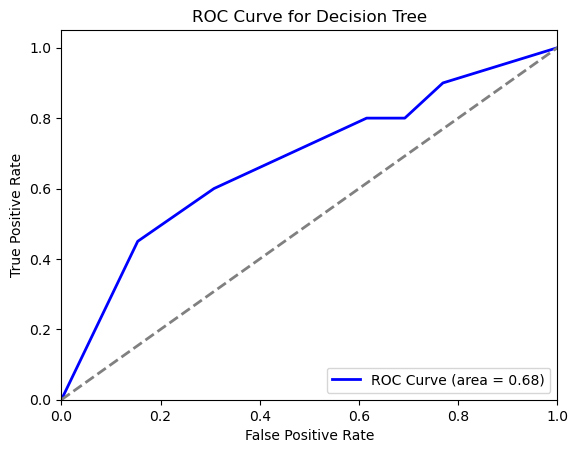


Confusion Matrix
[[ 5  8]
 [ 4 16]]


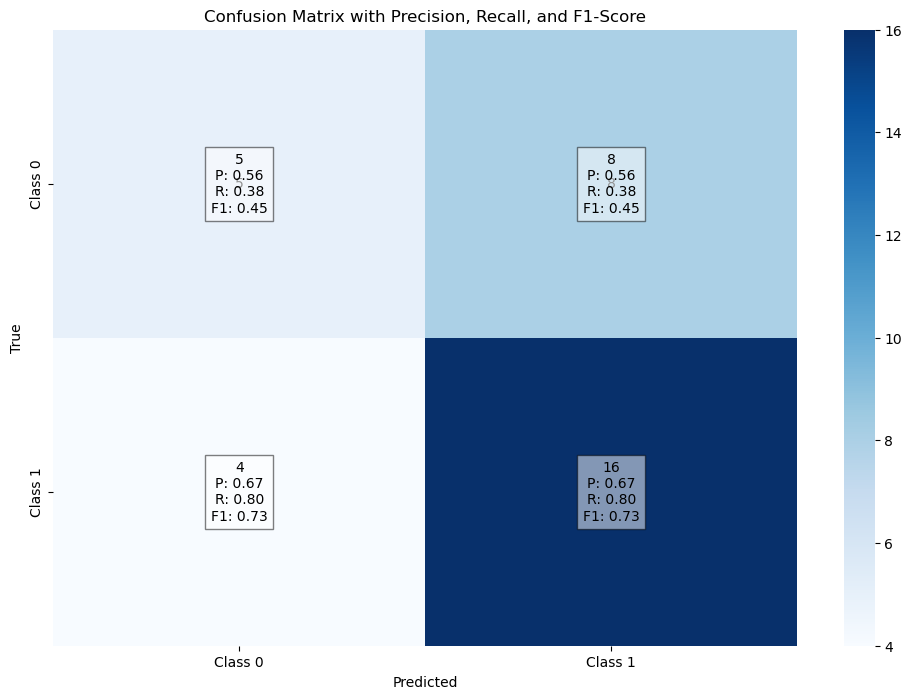

In [25]:
decision_tree(selected_data)

## **KNN Algorithm**

### KNN ALGORITHM (from k= 1 to k= 21)

In [26]:
# Separate predictor variables (X) and target variable (y)
X = selected_data.drop(columns=['Class_LIVES'])
y = selected_data['Class_LIVES']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_accuracy = 0
best_k = 0
results = []

for k in range(1, 21):
    # Initialize the KNN model with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append((k, accuracy, precision, recall, f1))

    print(f'k={k}, Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, AUC:{roc_auc_score(y_test, y_pred):.2f}')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_y_pred = y_pred

# Print the best value of k and its accuracy
print(f'\nBest k: {best_k}, with Accuracy: {best_accuracy:.2f}')

# Classification report for the best k
print("\nClassification Report for the best k")
print(classification_report(y_test, best_y_pred))

# Confusion matrix for the best k
print("\nConfusion Matrix for the best k")
print(confusion_matrix(y_test, best_y_pred))


k=1, Accuracy: 0.67, Precision: 0.66, Recall: 0.67, F1 Score: 0.66, AUC:0.64
k=2, Accuracy: 0.64, Precision: 0.68, Recall: 0.64, F1 Score: 0.64, AUC:0.66
k=3, Accuracy: 0.70, Precision: 0.69, Recall: 0.70, F1 Score: 0.68, AUC:0.66
k=4, Accuracy: 0.70, Precision: 0.71, Recall: 0.70, F1 Score: 0.70, AUC:0.70
k=5, Accuracy: 0.61, Precision: 0.58, Recall: 0.61, F1 Score: 0.58, AUC:0.55
k=6, Accuracy: 0.67, Precision: 0.66, Recall: 0.67, F1 Score: 0.66, AUC:0.64
k=7, Accuracy: 0.64, Precision: 0.62, Recall: 0.64, F1 Score: 0.61, AUC:0.58
k=8, Accuracy: 0.67, Precision: 0.67, Recall: 0.67, F1 Score: 0.67, AUC:0.66
k=9, Accuracy: 0.70, Precision: 0.69, Recall: 0.70, F1 Score: 0.69, AUC:0.67
k=10, Accuracy: 0.73, Precision: 0.72, Recall: 0.73, F1 Score: 0.73, AUC:0.71
k=11, Accuracy: 0.73, Precision: 0.72, Recall: 0.73, F1 Score: 0.72, AUC:0.69
k=12, Accuracy: 0.73, Precision: 0.72, Recall: 0.73, F1 Score: 0.73, AUC:0.71
k=13, Accuracy: 0.67, Precision: 0.66, Recall: 0.67, F1 Score: 0.65, AUC:

### ROC curve for k values that have accuracy >= 0.70




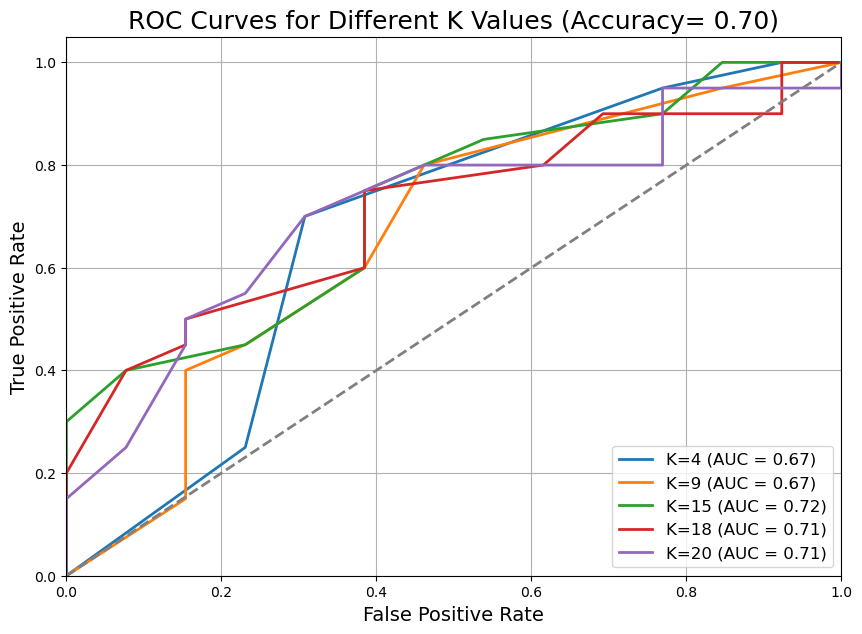

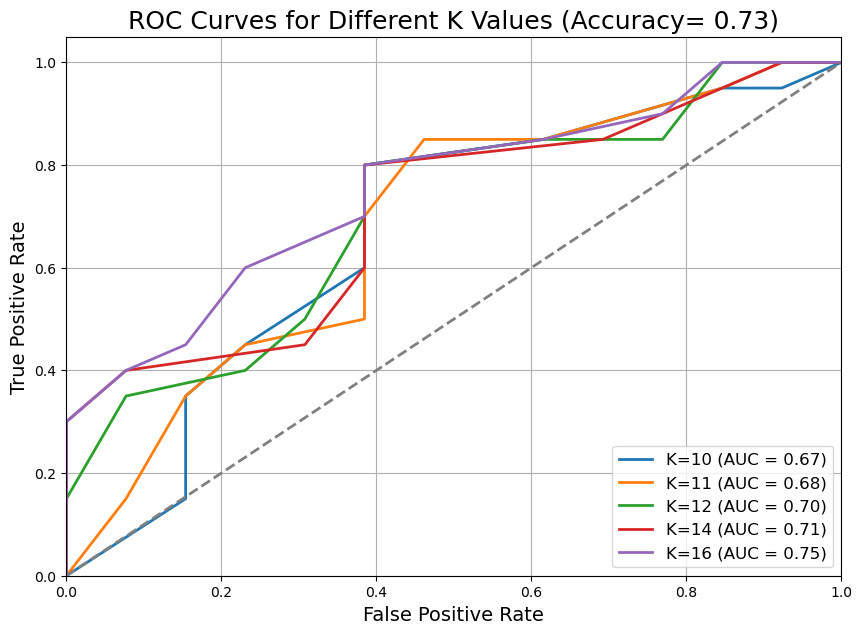

In [27]:
# Initialize lists to store the values of k
k_values_073 = [10, 11, 12, 14, 16]
k_values_070 = [4, 9, 15, 18, 20]

# Separate predictors and target variable
X = selected_data.drop(columns=['Class_LIVES'])
y = selected_data['Class_LIVES']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of specific k values to evaluate
k_values = [4, 9, 10, 11, 12, 14, 15, 16, 18, 20]  # Replace with your chosen k values

# Split the k values into two groups
k_values_group1 = [4, 9, 15, 18, 20]
k_values_group2 = [10, 11, 12, 14, 16]

# Initialize lists to store ROC curves and AUCs
fpr_list = []
tpr_list = []
roc_auc_list = []

# Function to compute ROC curve and AUC for a list of k values
def compute_roc_auc(k_values):
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predict probabilities for the positive class
        y_pred_prob = knn.predict_proba(X_test)[:, 1]

        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

        # Calculate the AUC
        roc_auc = roc_auc_score(y_test, y_pred_prob)

        # Store the results
        fpr_list.append(fpr)
        tpr_list.append(tpr)
        roc_auc_list.append(roc_auc)

# Compute ROC and AUC for the first group
compute_roc_auc(k_values_group1)

# Plot the ROC curves for the first group
plt.figure(figsize=(10, 7))

for i, k in enumerate(k_values_group1):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'K={k} (AUC = {roc_auc_list[i]:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Plot configuration for the first group
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Different K Values (Accuracy= 0.70)', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

# Clear the lists for the next group
fpr_list.clear()
tpr_list.clear()
roc_auc_list.clear()

# Compute ROC and AUC for the second group
compute_roc_auc(k_values_group2)

# Plot the ROC curves for the second group
plt.figure(figsize=(10, 7))

for i, k in enumerate(k_values_group2):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, label=f'K={k} (AUC = {roc_auc_list[i]:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Plot configuration for the second group
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Different K Values (Accuracy= 0.73)', fontsize=18)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


### For k=12, AUC has the highest value, so it's important to do a deep analysis to understand other important aspects (e.g. specificity,...)


Accuracy: 0.70
Classification Report
              precision    recall  f1-score   support

         0.0       0.64      0.54      0.58        13
         1.0       0.73      0.80      0.76        20

    accuracy                           0.70        33
   macro avg       0.68      0.67      0.67        33
weighted avg       0.69      0.70      0.69        33

Confusion Matrix
[[ 7  6]
 [ 4 16]]


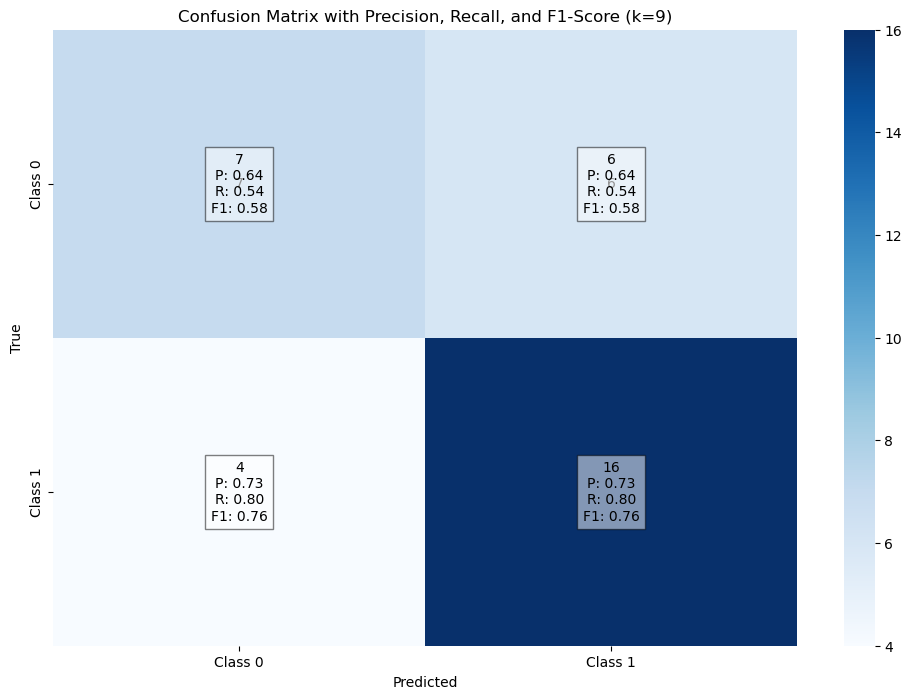

Negative Predictive Value (NPV): 0.64
Positive Predictive Value (PPV): 0.73
Specificity: 0.54
Sensitivity: 0.80


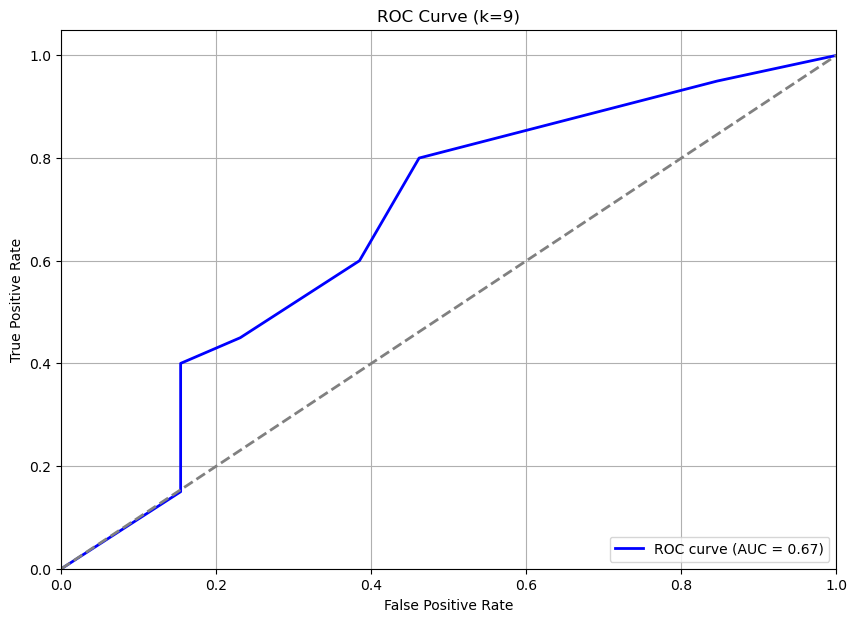

Cross-Validation Accuracy Scores: [0.66666667 0.81818182 0.63636364 0.72727273 0.6969697 ]
Mean Cross-Validation Accuracy: 0.71
Standard Deviation of Cross-Validation Accuracy: 0.06


In [28]:
# Separating predictors and target variable
X = selected_data.drop(columns=['Class_LIVES'])
y = selected_data['Class_LIVES']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best k value from your previous analysis
best_k = 9  # Replace with your determined best k value

# Retraining the model using the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn_best.predict(X_test)
y_pred_prob = knn_best.predict_proba(X_test)[:, 1]

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generating the classification report
report = classification_report(y_test, y_pred)
print("Classification Report")
print(report)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

# Plotting the confusion matrix with additional metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j+0.5, i+0.5, f'{cm[i, j]}\nP: {precision[i]:.2f}\nR: {recall[i]:.2f}\nF1: {f1[i]:.2f}',
                 ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix with Precision, Recall, and F1-Score (k={best_k})')
plt.show()

# Calculating additional metrics
TN, FP, FN, TP = cm.ravel()
NPV = TN / (TN + FN)
PPV = TP / (TP + FP)
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print(f'Negative Predictive Value (NPV): {NPV:.2f}')
print(f'Positive Predictive Value (PPV): {PPV:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')

# Calculating the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plotting the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (k={best_k})')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Performing cross-validation to ensure generalization
cross_val_scores = cross_val_score(knn_best, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores: {cross_val_scores}')
print(f'Mean Cross-Validation Accuracy: {cross_val_scores.mean():.2f}')
print(f'Standard Deviation of Cross-Validation Accuracy: {cross_val_scores.std():.2f}')


## **Random Forest**

Accuracy: 0.70, Precision: 0.70, Recall: 0.70, F1 Score: 0.70
Classification report
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62        13
         1.0       0.75      0.75      0.75        20

    accuracy                           0.70        33
   macro avg       0.68      0.68      0.68        33
weighted avg       0.70      0.70      0.70        33

Confusion Matrix
[[ 8  5]
 [ 5 15]]


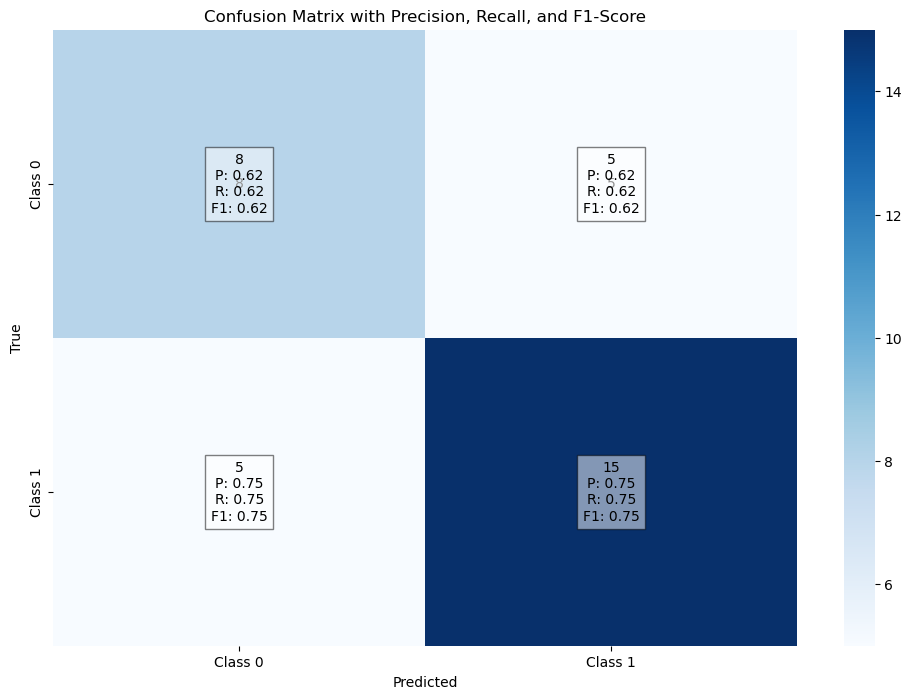

In [29]:
# Separate the predictor variables (X) and the target variable (y)
X = selected_data.drop(columns=['Class_LIVES'])  #dados_selecionados
y = selected_data['Class_LIVES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
results.append((k, accuracy, precision, recall, f1))

print(f'Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')


# Classification report
print("Classification report")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

# Plot the confusion matrix with additional metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
for i in range(len(cm)):
    for j in range(len(cm[i])):
        plt.text(j+0.5, i+0.5, f'{cm[i, j]}\nP: {precision[i]:.2f}\nR: {recall[i]:.2f}\nF1: {f1[i]:.2f}',
                 ha='center', va='center', color='black', bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Precision, Recall, and F1-Score')
plt.show()

# Compute predicted probabilities for the positive class
y_pred_proba = rf.predict_proba(X_test)[:, 1]


#**DATA EVALUATION**

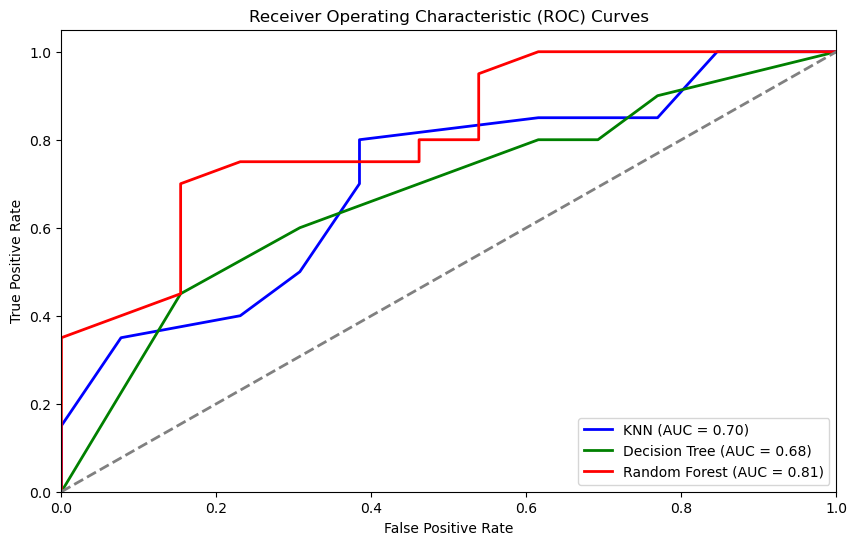

In [30]:
# Separate the predictor variables (X) and the target variable (y)
X = selected_data.drop(columns=['Class_LIVES'])
y = selected_data['Class_LIVES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=12)
decision_tree = DecisionTreeClassifier(max_leaf_nodes=8, criterion="gini", random_state=0)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the models
knn.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions and calculate probabilities
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

y_pred_dt = decision_tree.predict(X_test)
y_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]

y_pred_rf = random_forest.predict(X_test)
y_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# Print accuracy and classification report for each model
#print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}')
#print("KNN Classification report")
#print(classification_report(y_test, y_pred_knn))

#print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}')
#print("Decision Tree Classification report")
#print(classification_report(y_test, y_pred_dt))

#print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
#print("Random Forest Classification report")
#print(classification_report(y_test, y_pred_rf))


In [31]:
# Defining the evaluation data
data = {
    'Algorithms': ['Decision Tree', 'KNN k=9', 'KNN k=10', 'KNN k=11', 'KNN k=12', 'KNN k=16', 'Random Forest'],
    'Accuracy': [0.64, 0.76, 0.76, 0.76, 0.73, 0.73, 0.79],
    'Precision': [0.56, 0.76, 0.76, 0.76, 0.73, 0.73, 0.71],
    'Recall': [0.38, 0.76, 0.76, 0.76, 0.73, 0.73, 0.77],
    'F1-score': [0.45, 0.76, 0.76, 0.76, 0.73, 0.73, 0.74],
    'AUC': [0.68, 0.75, 0.75, 0.75, 0.72, 0.72, 0.84]
}

# Creating a DataFrame with this data
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
csv_file_path = 'comparison_results.csv'
df.to_csv(csv_file_path, index=False)

# DataFrame visualization
df

,Algorithms,Accuracy,Precision,Recall,F1-score,AUC
0,Decision Tree,0.64,0.56,0.38,0.45,0.68
1,KNN k=9,0.76,0.76,0.76,0.76,0.75
2,KNN k=10,0.76,0.76,0.76,0.76,0.75
3,KNN k=11,0.76,0.76,0.76,0.76,0.75
4,KNN k=12,0.73,0.73,0.73,0.73,0.72
5,KNN k=16,0.73,0.73,0.73,0.73,0.72
6,Random Forest,0.79,0.71,0.77,0.74,0.84
